<a href="https://colab.research.google.com/github/Nandilath/ML/blob/main/ResNet_Architecture_with_MNIST_Hand_written_digit_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ResNet Architecture with MNIST hand written digit dataset 

Epoch 1/10
469/469 [==============================] - 19s 25ms/step - loss: 0.1527 - accuracy: 0.9587 - val_loss: 0.0751 - val_accuracy: 0.9752
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0520 - accuracy: 0.9847 - val_loss: 0.0897 - val_accuracy: 0.9739
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0402 - accuracy: 0.9884 - val_loss: 0.0405 - val_accuracy: 0.9897
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.3751 - val_accuracy: 0.9463
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0261 - accuracy: 0.9923 - val_loss: 0.0903 - val_accuracy: 0.9783
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0336 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0497 - val_accuracy:

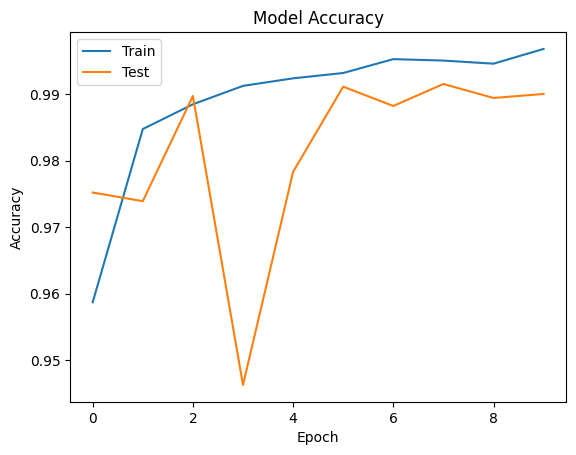

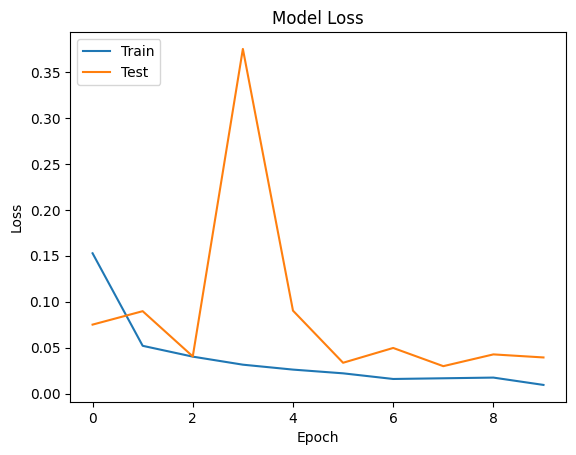

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, Dense, Add
from keras.models import Model

# Define the ResNet block
def resnet_block(input_data, filters):
    x = Conv2D(filters, kernel_size=(3,3), strides=(1,1), padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_data])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = resnet_block(x, 32)
x = Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = resnet_block(x, 64)
x = Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = resnet_block(x, 128)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()


Epoch 1/20
469/469 [==============================] - 18s 16ms/step - loss: 0.1012 - accuracy: 0.9686 - val_loss: 0.1558 - val_accuracy: 0.9476
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0322 - accuracy: 0.9895 - val_loss: 0.0344 - val_accuracy: 0.9891
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0269 - val_accuracy: 0.9916
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0276 - val_accuracy: 0.991

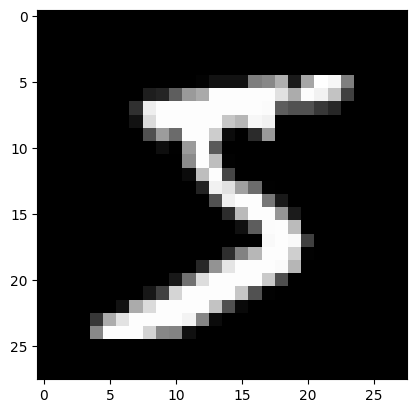

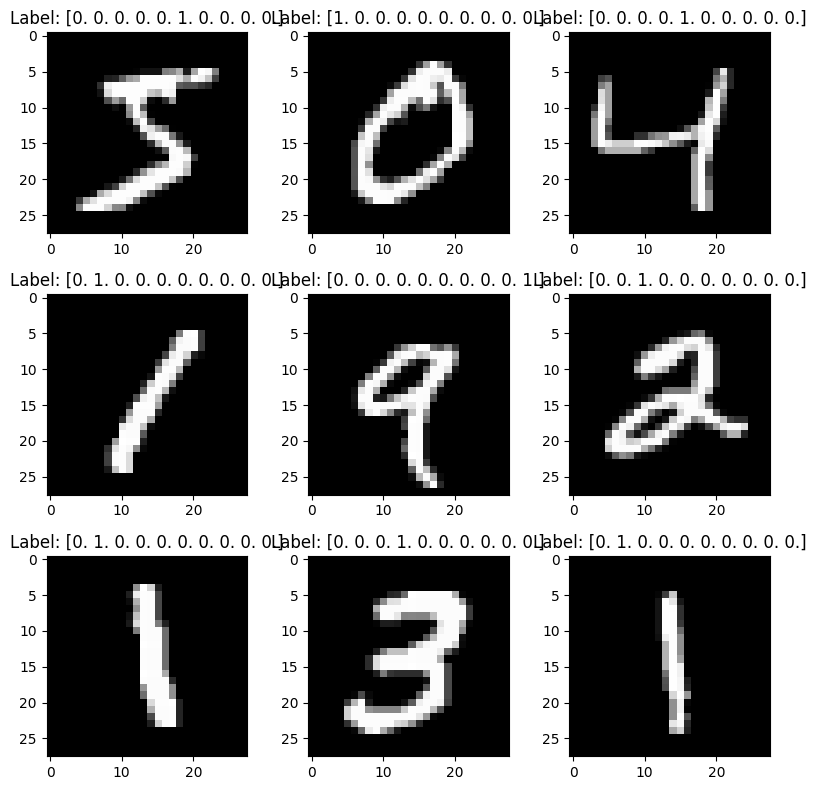

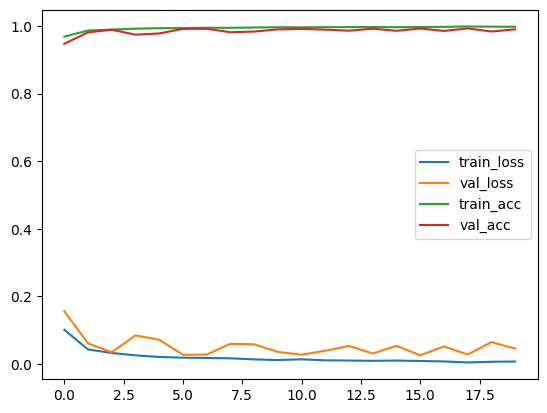

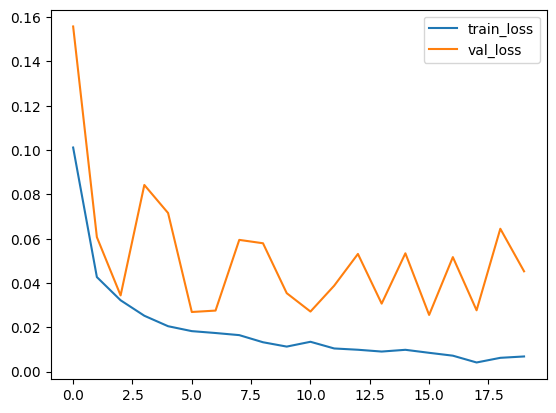

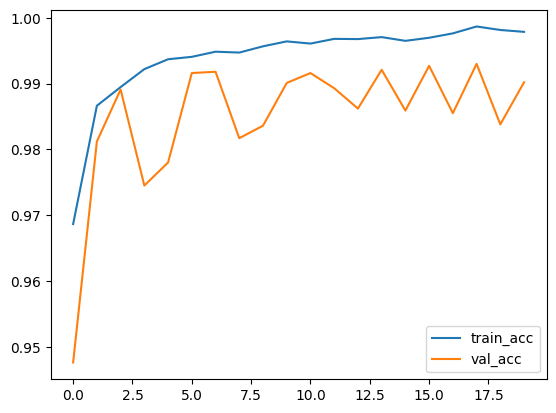

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.97      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 978    0    1    0    0    0    0    1    0    0]
 [   0 1132    0    2    0    0    0    1    0    0]
 [   1    1 1022    3    0    0    0   

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D


# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=20)

# Plot a single image
plt.imshow(x_train[0], cmap='gray')
plt.show()

# Plot a batch of images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title("Label: {}".format(y_train[i]))
plt.tight_layout()
plt.show()


# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


Gaussian noise _5% and Epochs = 10

Epoch 1/10
469/469 [==============================] - 20s 18ms/step - loss: 0.1023 - accuracy: 0.9678 - val_loss: 0.4561 - val_accuracy: 0.8606
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0500 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0638 - val_accuracy: 0.9798
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0328 - val_accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0744 - val_accuracy: 0.9802
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0240 - val_accuracy: 0.992

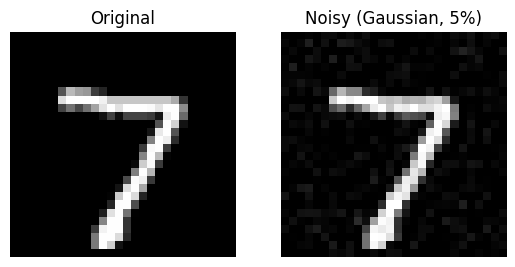

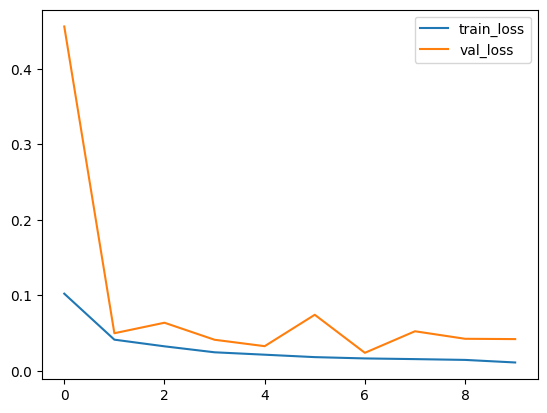

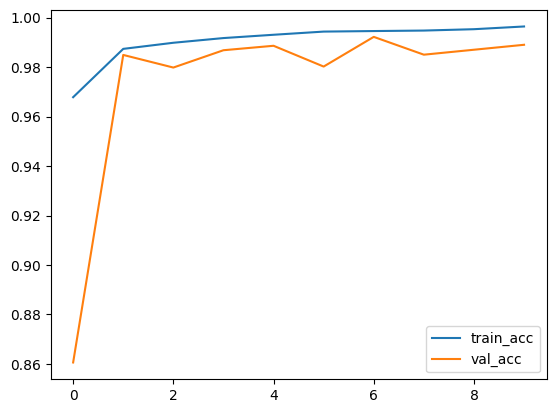

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
noise_scale = 0.05
x_train_noisy = x_train + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=10)

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


# Plot a single image with and without noise
img_index = 0

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[img_index], cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot the noisy image
noise_level = 0.05
plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[img_index], cmap='gray')
plt.title(f'Noisy (Gaussian, {noise_level*100:.0f}%)')
plt.axis('off')

plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()







Gaussian Noise = 5% with Epochs = 20

Epoch 1/20
469/469 [==============================] - 20s 21ms/step - loss: 0.1039 - accuracy: 0.9678 - val_loss: 0.2411 - val_accuracy: 0.9228
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0484 - val_accuracy: 0.9854
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0642 - val_accuracy: 0.9813
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0515 - val_accuracy: 0.9859
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0555 - val_accuracy: 0.9850
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0484 - val_accuracy: 0.986

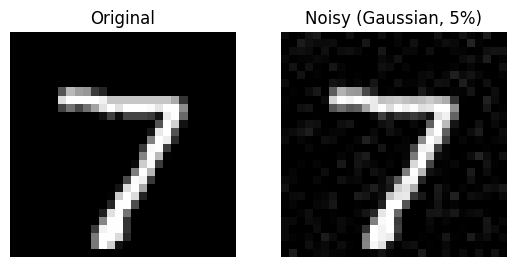

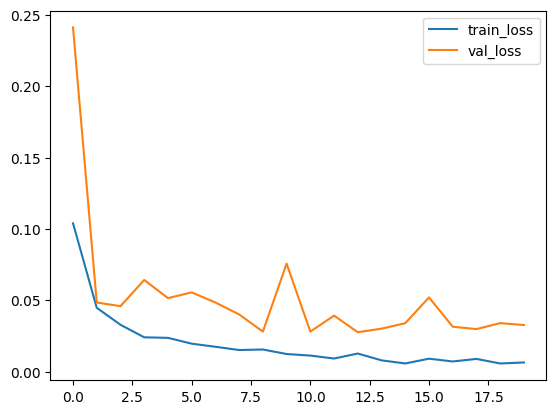

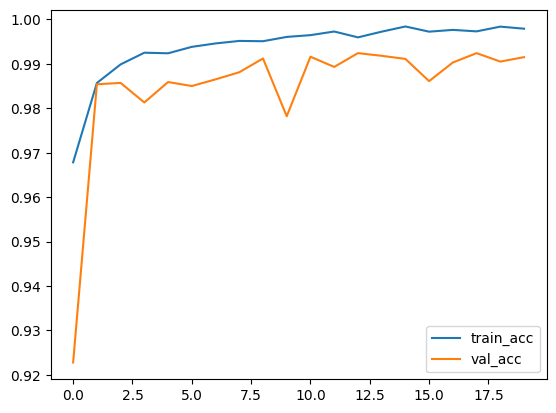

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
noise_scale = 0.05
x_train_noisy = x_train + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=20)

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


# Plot a single image with and without noise
img_index = 0

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[img_index], cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot the noisy image
noise_level = 0.05
plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[img_index], cmap='gray')
plt.title(f'Noisy (Gaussian, {noise_level*100:.0f}%)')
plt.axis('off')

plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


Gaussian Noise 10% + Epochs = 10

Epoch 1/10
469/469 [==============================] - 19s 18ms/step - loss: 0.1084 - accuracy: 0.9664 - val_loss: 0.1864 - val_accuracy: 0.9370
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0633 - val_accuracy: 0.9802
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0641 - val_accuracy: 0.9809
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0501 - val_accuracy: 0.9861
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0815 - val_accuracy: 0.9753
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.0328 - val_accuracy: 0.9901
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0582 - val_accuracy: 0.983

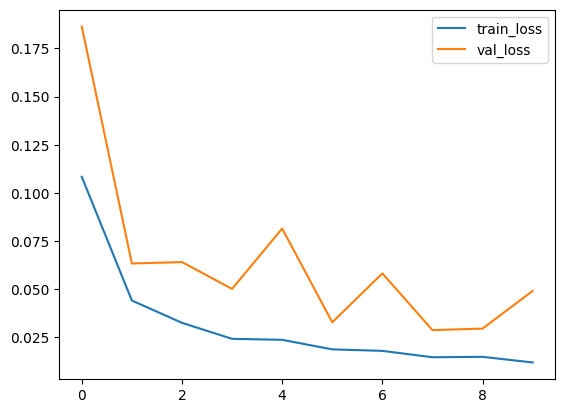

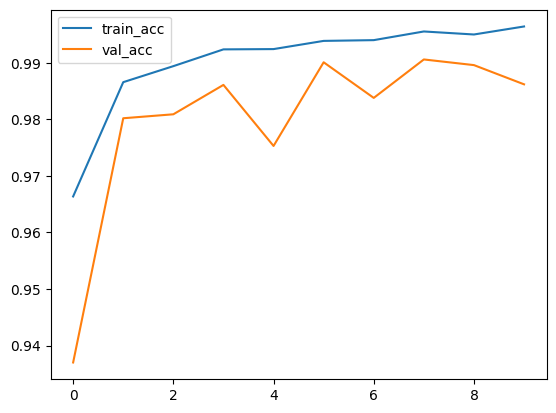

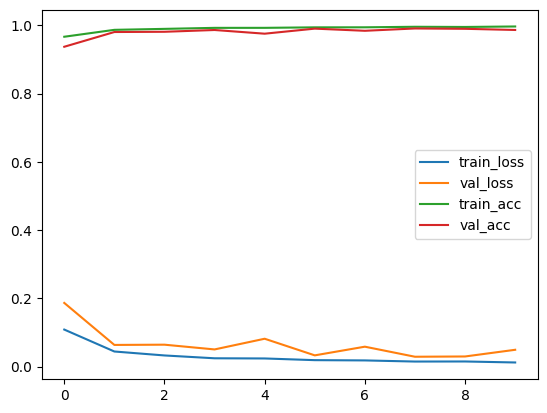

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 975    0    0    0    0    1    2    1    1    0]
 [   0 1127    0    0    1    1    0    3    2    1]
 [   1    7  991    0    0    0    1   

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
x_train_noisy = x_train + 0.1 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + 0.1 * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=10)

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(x_test_noisy.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))




Gaussian Noise = 10% with Epochs = 20

Epoch 1/20
469/469 [==============================] - 19s 19ms/step - loss: 0.1093 - accuracy: 0.9658 - val_loss: 0.1273 - val_accuracy: 0.9595
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.1067 - val_accuracy: 0.9683
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0365 - val_accuracy: 0.9872
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0337 - val_accuracy: 0.9894
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0419 - val_accuracy: 0.9863
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0338 - val_accuracy: 0.98

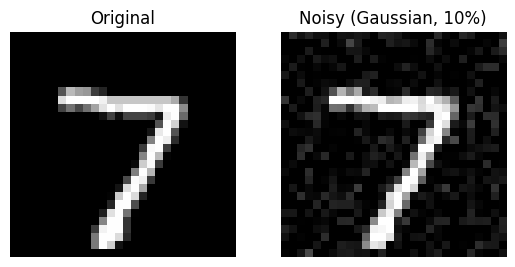

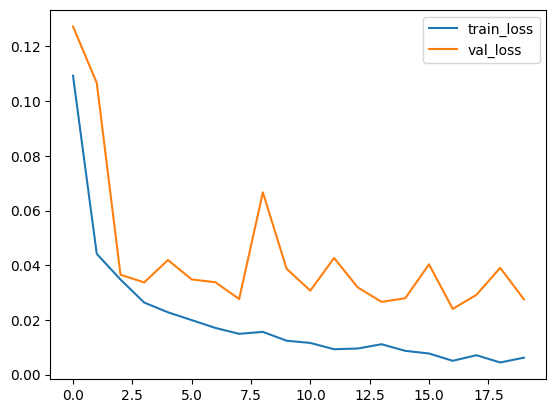

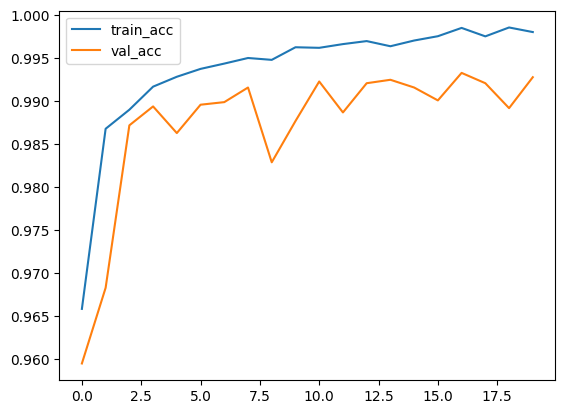

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
noise_scale = 0.1
x_train_noisy = x_train + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=20)

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


# Plot a single image with and without noise
img_index = 0

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[img_index], cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot the noisy image
noise_level = 0.10
plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[img_index], cmap='gray')
plt.title(f'Noisy (Gaussian, {noise_level*100:.0f}%)')
plt.axis('off')

plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()




Gaussian Noise -15% with Epochs = 10

Epoch 1/10
375/375 [==============================] - 13s 31ms/step - loss: 0.1555 - accuracy: 0.9509 - val_loss: 0.0644 - val_accuracy: 0.9787
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0487 - val_accuracy: 0.9857
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0625 - val_accuracy: 0.9813
Epoch 4/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0722 - val_accuracy: 0.9811
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0657 - val_accuracy: 0.9847
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.0732 - val_accuracy: 0.9825
Epoch 7/10
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0   

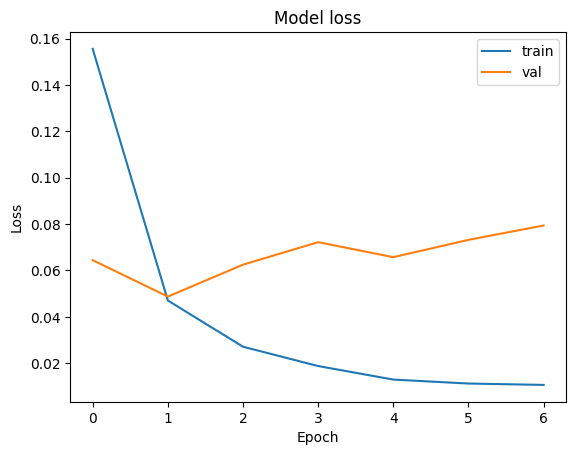

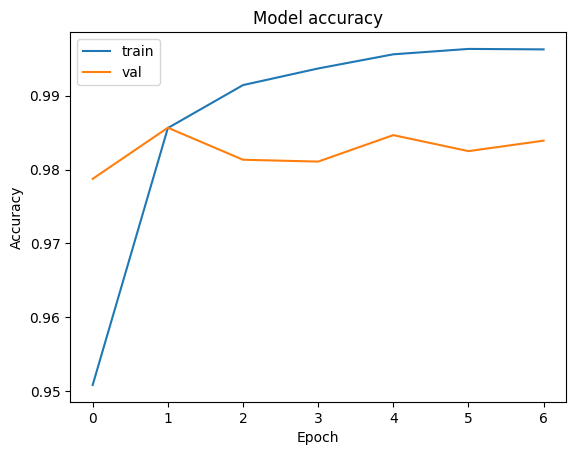

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 15% Gaussian noise to the images
noise_factor = 0.15
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Gaussian Noise -15% with Epochs = 20

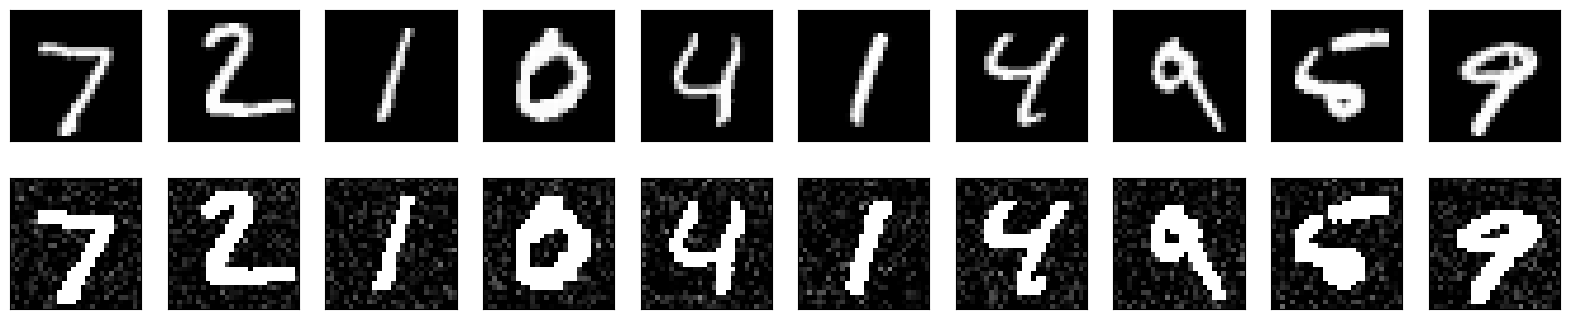

Epoch 1/20
375/375 [==============================] - 14s 33ms/step - loss: 0.1598 - accuracy: 0.9507 - val_loss: 0.0618 - val_accuracy: 0.9820
Epoch 2/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0562 - val_accuracy: 0.9825
Epoch 3/20
375/375 [==============================] - 13s 34ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 4/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0598 - val_accuracy: 0.9843
Epoch 5/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.0659 - val_accuracy: 0.9853
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.0635 - val_accuracy: 0.9844
Epoch 7/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.0759 - val_accuracy:

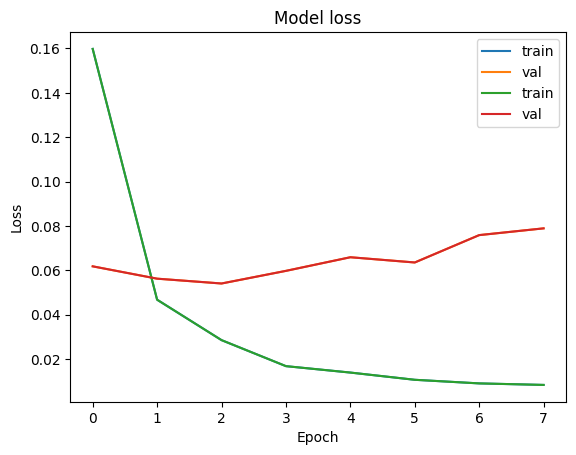

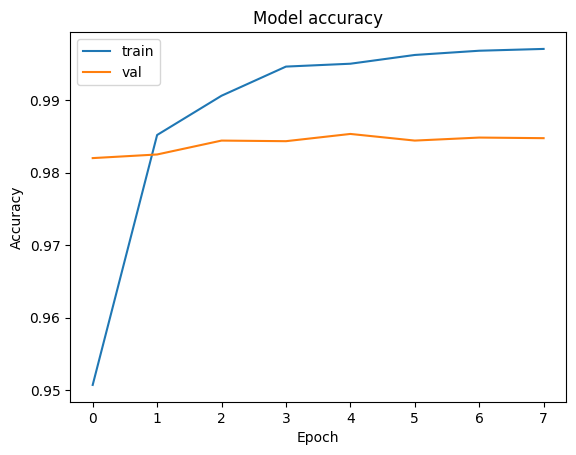

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 15% Gaussian noise to the images
noise_factor = 0.15
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show

# Plot the loss curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



Gaussian Noise -20% with Epochs =20

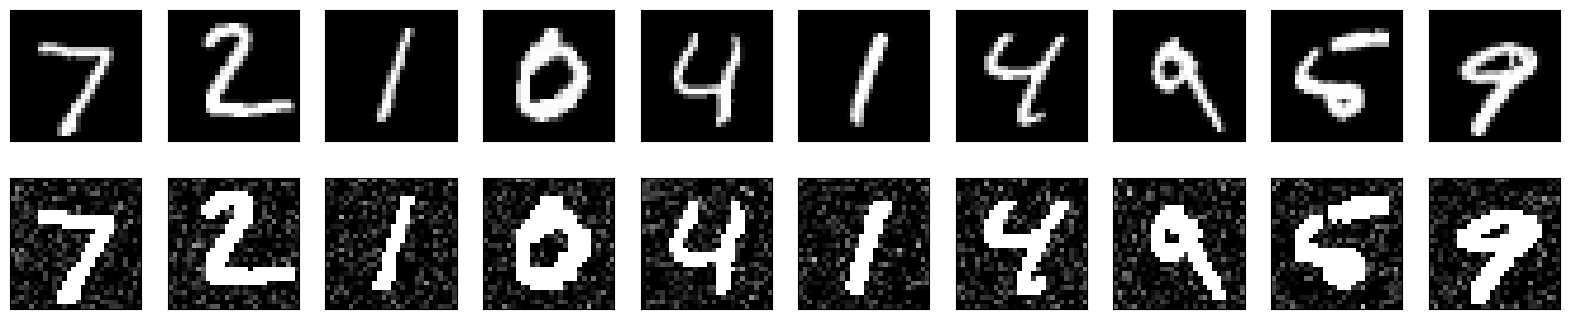

Epoch 1/20
375/375 [==============================] - 14s 33ms/step - loss: 0.1612 - accuracy: 0.9500 - val_loss: 0.0624 - val_accuracy: 0.9821
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 3/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0596 - val_accuracy: 0.9835
Epoch 4/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0541 - val_accuracy: 0.9856
Epoch 5/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0753 - val_accuracy: 0.9838
Epoch 6/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0697 - val_accuracy: 0.9840
Epoch 7/20
313/313 [==============================] - 1s 3ms/step
Classification report:
              precision    recall  f1-score   s

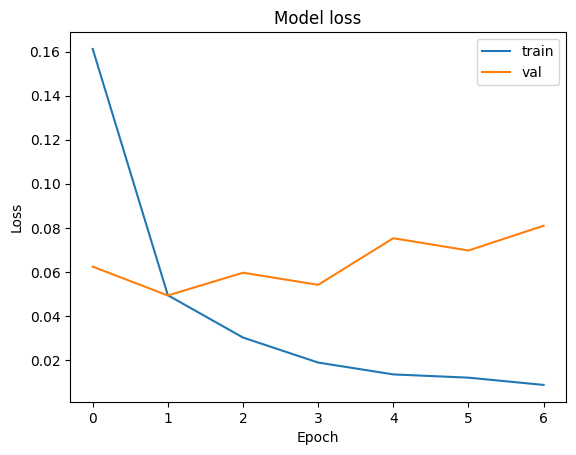

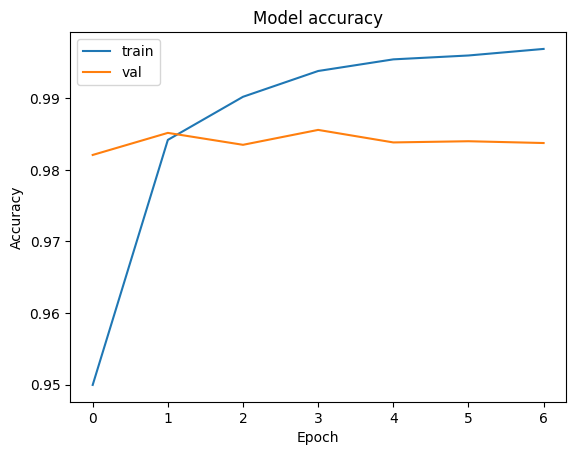

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 20% Gaussian noise to the images
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Gaussian Noise -20% with Epochs=10

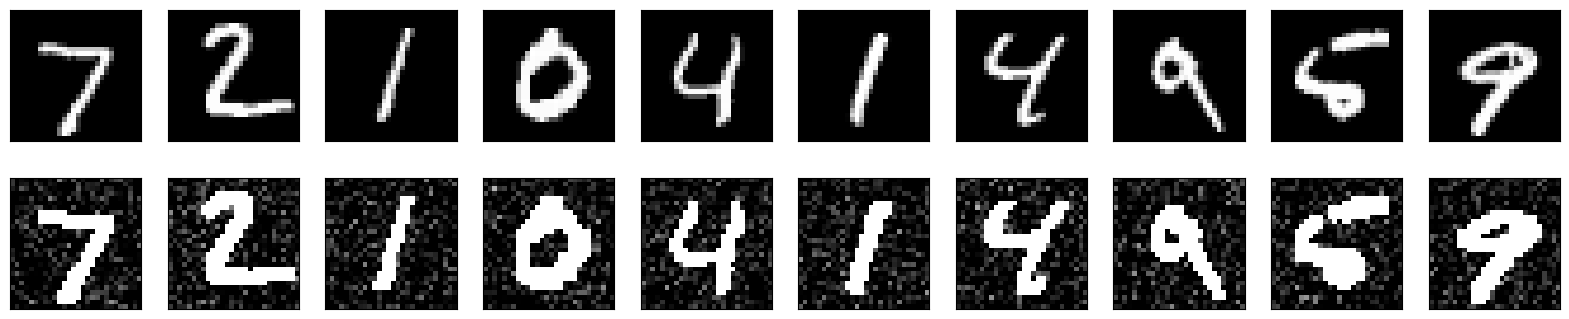

Epoch 1/10
375/375 [==============================] - 14s 32ms/step - loss: 0.1858 - accuracy: 0.9417 - val_loss: 0.0731 - val_accuracy: 0.9774
Epoch 2/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0568 - val_accuracy: 0.9827
Epoch 3/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0512 - val_accuracy: 0.9852
Epoch 4/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0719 - val_accuracy: 0.9815
Epoch 5/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0604 - val_accuracy: 0.9853
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0682 - val_accuracy: 0.9839
Epoch 7/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0887 - val_accuracy:

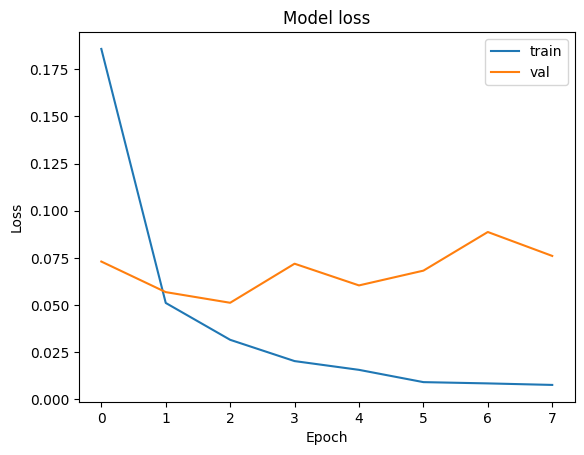

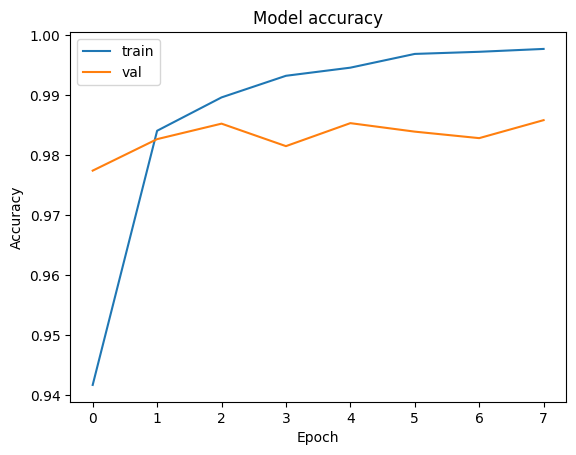

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 20% Gaussian noise to the images
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Gaussian Noise -25% with Epochs=20

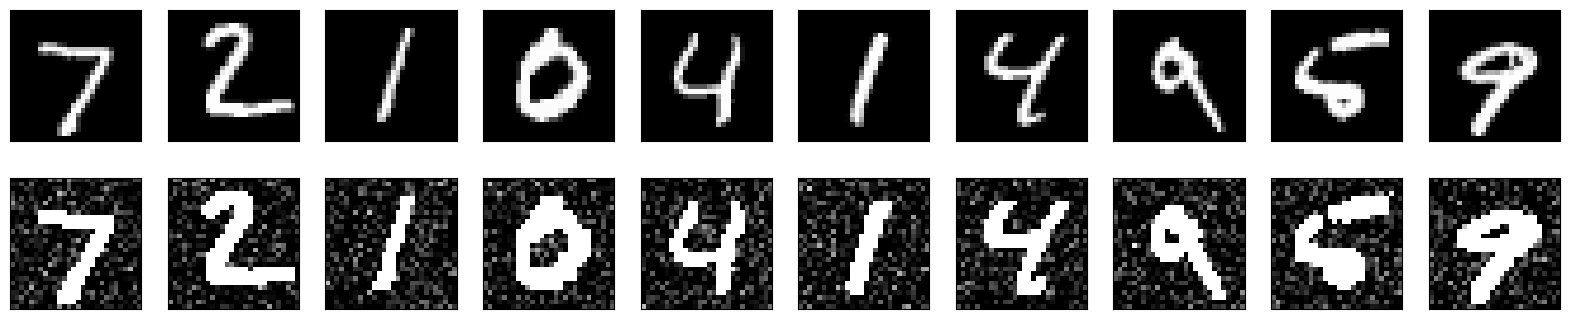

Epoch 1/20
375/375 [==============================] - 14s 32ms/step - loss: 0.1826 - accuracy: 0.9444 - val_loss: 0.0658 - val_accuracy: 0.9809
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0550 - val_accuracy: 0.9828
Epoch 3/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0606 - val_accuracy: 0.9815
Epoch 4/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.0523 - val_accuracy: 0.9870
Epoch 5/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0131 - accuracy: 0.9952 - val_loss: 0.0669 - val_accuracy: 0.9860
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0797 - val_accuracy: 0.9806
Epoch 7/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0566 - val_accuracy:

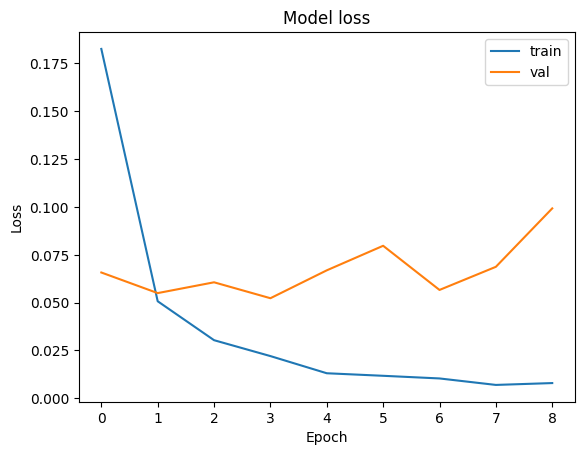

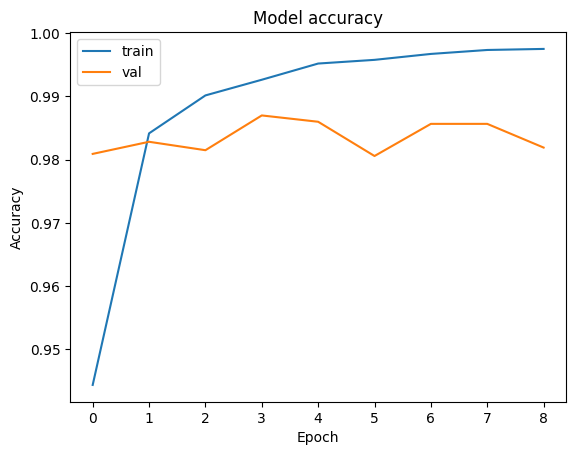

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 25% Gaussian noise to the images
noise_factor = 0.25
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Gaussian Noise -25% with epochs =10

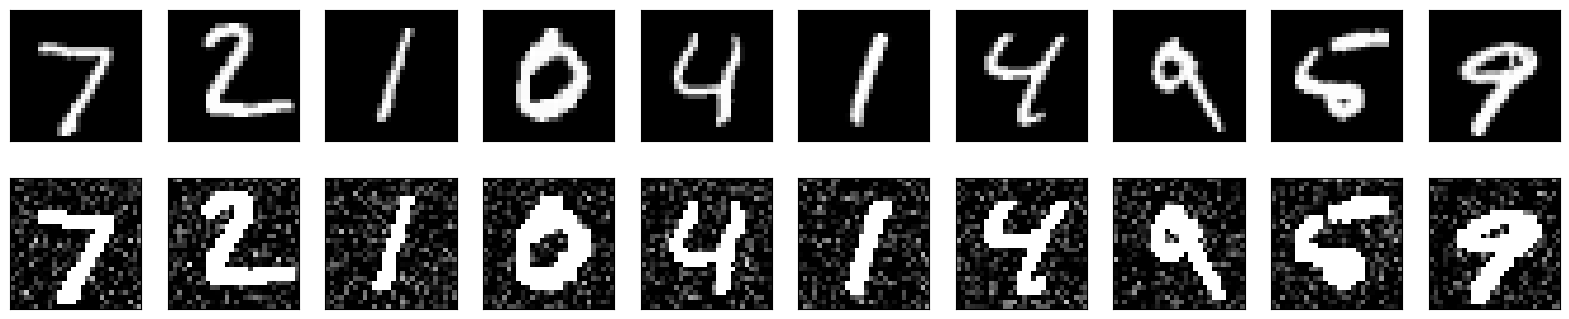

Epoch 1/10
375/375 [==============================] - 14s 32ms/step - loss: 0.1694 - accuracy: 0.9479 - val_loss: 0.0632 - val_accuracy: 0.9815
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0539 - val_accuracy: 0.9827
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0537 - val_accuracy: 0.9836
Epoch 4/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0540 - val_accuracy: 0.9865
Epoch 5/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0649 - val_accuracy: 0.9861
Epoch 6/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0736 - val_accuracy: 0.9835
Epoch 7/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0690 - val_accuracy:

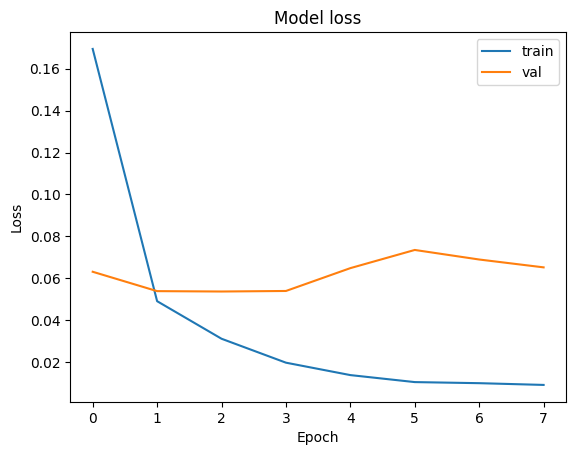

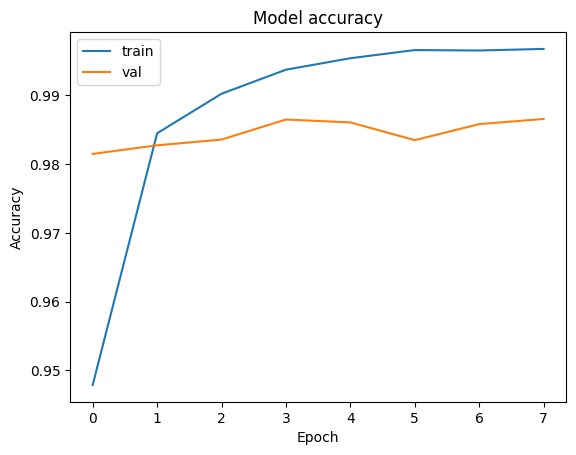

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 25% Gaussian noise to the images
noise_factor = 0.25
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Gaussian Noise 30% with Epochs = 10

11490434/11490434 [==============================] - 0s 0us/step


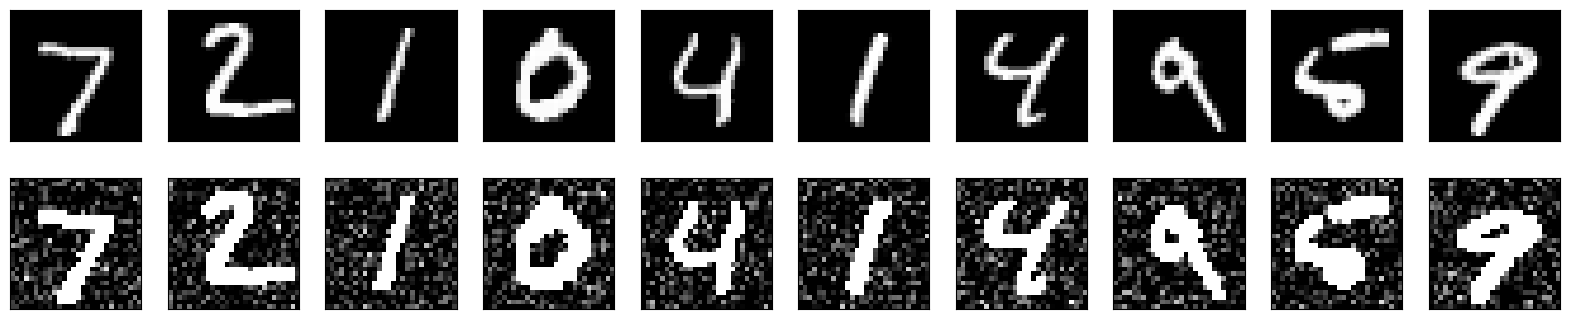

Epoch 1/10
375/375 [==============================] - 1168s 3s/step - loss: 0.1811 - accuracy: 0.9454 - val_loss: 0.0651 - val_accuracy: 0.9812
Epoch 2/10
375/375 [==============================] - 1072s 3s/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0582 - val_accuracy: 0.9834
Epoch 3/10
375/375 [==============================] - 991s 3s/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0600 - val_accuracy: 0.9825
Epoch 4/10
375/375 [==============================] - 990s 3s/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0614 - val_accuracy: 0.9838
Epoch 5/10
375/375 [==============================] - 969s 3s/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0623 - val_accuracy: 0.9845
Epoch 6/10
375/375 [==============================] - 978s 3s/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0807 - val_accuracy: 0.9828
Epoch 7/10
313/313 [==============================] - 54s 173ms/step
Classification Report:
               precision    recall  f1-score   s

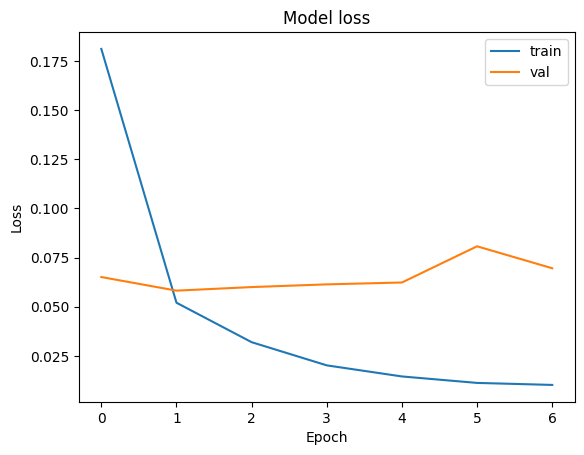

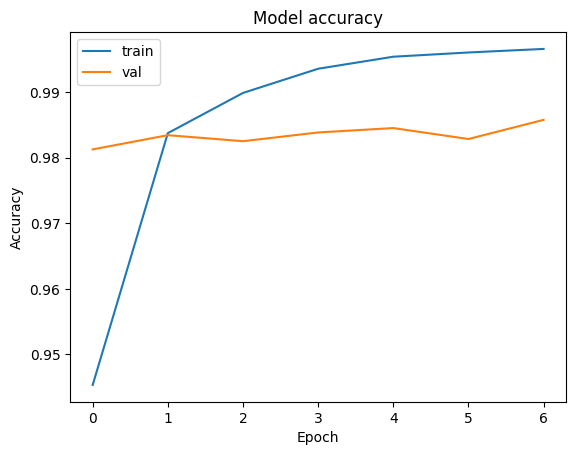

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 30% Gaussian noise to the images
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Gaussian Noise -30% with Epochs = 20

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 30% Gaussian noise to the images
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Gaussian Noise -50% with Epochs = 10

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 50% Gaussian noise to the images
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))


# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Gaussian Noise - 50% with Epochs = 20

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 50% Gaussian noise to the images
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))


# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Gaussian Noise -75% with Epochs = 20

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

#Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Add 75% Gaussian noise to the images
noise_factor = 0.75
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

#Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
# Original image
ax = plt.subplot(2, n, i + 1)
plt.imshow(X_test[i])
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Noisy image
ax = plt.subplot(2, n, i + 1 + n)
plt.imshow(X_test_noisy[i])
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

#Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

#Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

#Evaluate the model on the test set

y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#Print classification report, precision, recall and confusion matrix

print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

#Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Gaussian Noise -75% with Epochs = 10

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 75% Gaussian noise to the images
noise_factor = 0.75
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()




Gaussian Noise -100% with Epochs = 20

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 100% Gaussian noise to the images
noise_factor = 1.0
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))



# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



Gaussian Noise -100% with Epochs = 10

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 100% Gaussian noise to the images
noise_factor = 1.0
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))


# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
